#### Fetal Health prediction-classification analysis 

##### overview 

This analysis aims to predicts fetal health status  to allow Doctors and health care professions to act fast, in low and limited resource settings by identifying mothers with abnormal features on cardiotocogram. 

##### Problem
Child and Maternal Health is one of  critical issues facing our country, The UN expects by 2030, countries to end preventable death of Newborns and Under 5 years children. With the aim to reduce to at least as low as 25 per 1000.

Parallel to child mortality, also there is ** maternal mortality in 2017 accounted for 295000 **, and 94% of these occured in LMICs, in which most can be Prevented. 

Cardiotocogram is small cost effective tool that use ultrasound waves to assess both fetal and maternal health, allowing healthcare professionals to take action immediately 

##### Key Questions

1. what factors  most strongly influence Fetal health status ?
2. which Mothers and their babies requires immediate attention versus waiting? 



##### DATA Description 

Source : [text](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1. Normal : 1
2. Suspect : 2
3. Pathological : 3

###### key features: 

1. baseline value - FHR baseline (beats per minute)
2. accelerations - Number of accelerations per second
3. fetal_movement - Number of fetal movements per second
4. uterine_contractions - Number of uterine contractions per second
5. light_decelerations- Number of light decelerations per second
6. severe_decelerations- Number of severe decelerations per second
7. prolongued_decelerations- Number of prolonged decelerations per second
8. abnormal_short_term_variability - Percentage of time with abnormal short term variability
9. mean_value_of_short_term_variability  - Mean value of short term variability
10. percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long term variability
11. mean_value_of_long_term_variability - Mean value of long term variability
12. histogram_width - Width of FHR histogram
13. histogram_min - Minimum (low frequency) of FHR histogram
14. histogram_max - Maximum (high frequency) of FHR histogram
15. histogram_number_of_peaks - Number of histogram peaks
16. histogram_number_of_zeroes - Number of histogram zeros
17. histogram_mode - Histogram mode
18. histogram_mean - Histogram mean
19. histogram_median - Histogram median
20. histogram_variance - Histogram variance
21. histogram_tendency - Histogram tendency





In [57]:
# import the necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import time
import warnings


# Define a three-color palette: blue, orange, green
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

# Set as default for seaborn
sns.set_palette(custom_palette)

# Set as default for matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

warnings.filterwarnings('ignore')



In [58]:
#import the dataframe 

df = pd.read_csv('fetal_health.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [59]:
#explore data

df.corr()['fetal_health']

baseline value                                            0.148151
accelerations                                            -0.364066
fetal_movement                                            0.088010
uterine_contractions                                     -0.204894
light_decelerations                                       0.058870
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_width                                          -0.068789
histogram_min                                             0.063175
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.02

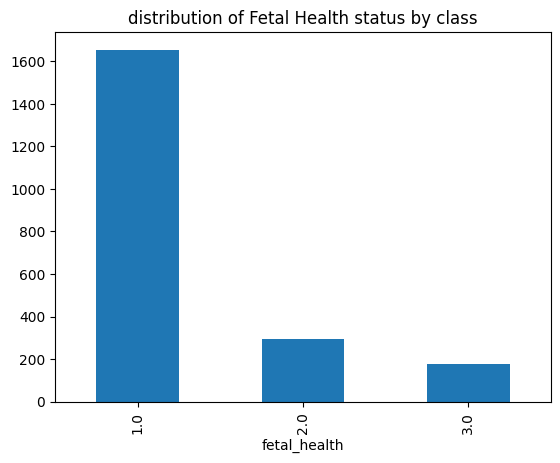

In [60]:
#explore the ditribution of the categorical variable 
df['fetal_health'].value_counts().plot(kind='bar')
plt.title('distribution of Fetal Health status by class')
plt.show()

In [61]:

# data processing 

def wrangle(data):
    
    #lets remove data they may contribute to data leakage 
    data.drop(columns=['severe_decelerations','prolongued_decelerations', 'light_decelerations'], inplace=True)
    
    #drop features that were done in calculations for variable analysis by selecting features in real world case scenarion
    data = data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'fetal_health']]
    
    return data



In [62]:
#experimentation
df1 = wrangle(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   baseline value        2126 non-null   float64
 1   accelerations         2126 non-null   float64
 2   fetal_movement        2126 non-null   float64
 3   uterine_contractions  2126 non-null   float64
 4   fetal_health          2126 non-null   float64
dtypes: float64(5)
memory usage: 83.2 KB


In [63]:
#explore for any missing values 
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
fetal_health,2126.0,1.304327,0.614377,1.0,1.000,1.000,1.000,3.000


<Figure size 2000x1600 with 0 Axes>

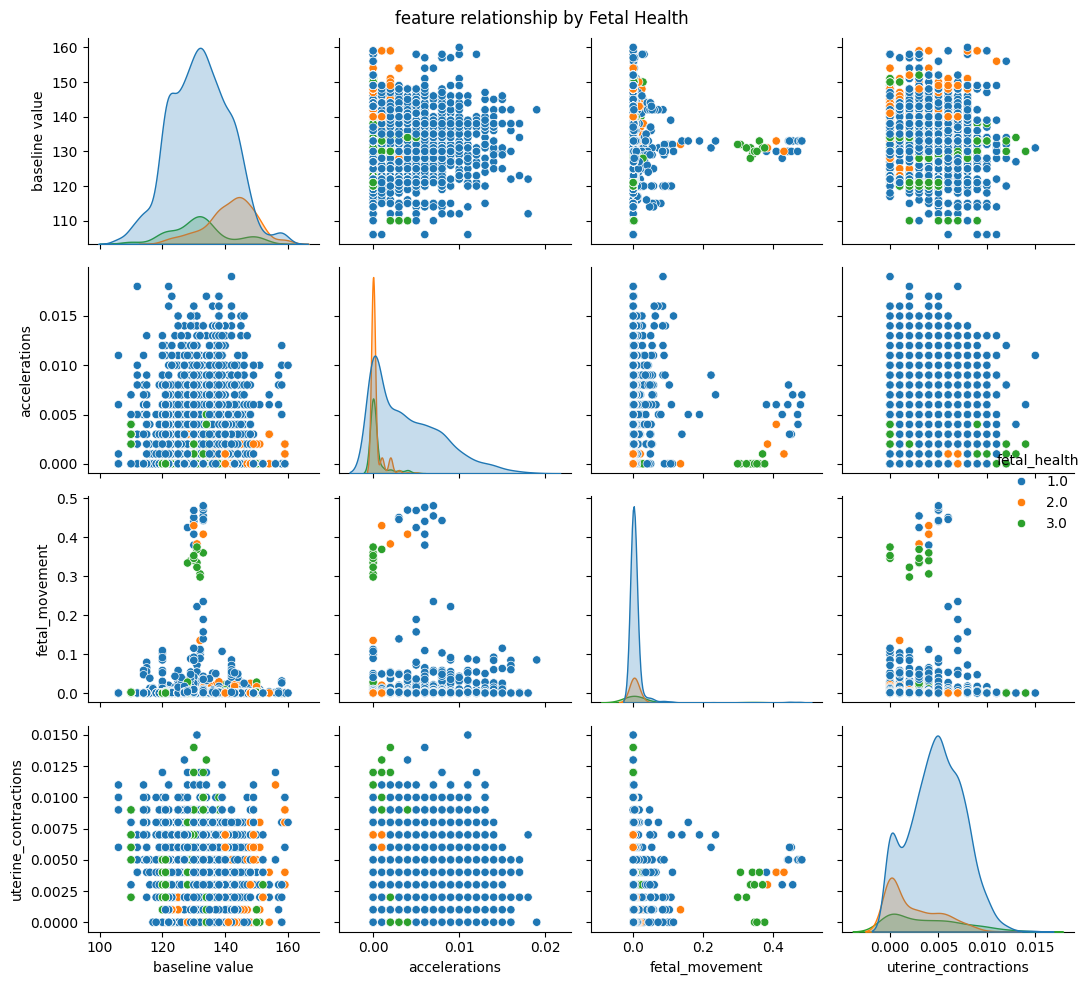

In [64]:
#explore the patterns within our dataset with selected features 
plt.figure(figsize=(20,16))
sns.pairplot(df1, hue='fetal_health', palette=custom_palette)
plt.suptitle('feature relationship by Fetal Health')
plt.tight_layout()
plt.show()

In [65]:
#lets evaluate if there are no missing values 
df1.isnull().sum()

baseline value          0
accelerations           0
fetal_movement          0
uterine_contractions    0
fetal_health            0
dtype: int64

In [66]:
#summarise statistics 

category = df1.groupby('fetal_health').mean()
category.T

fetal_health,1.0,2.0,3.0
baseline value,131.981873,141.684746,131.687500
accelerations,0.003992,0.000275,0.000392
fetal_movement,0.007963,0.008332,0.025676
uterine_contractions,0.004781,0.002390,0.003784


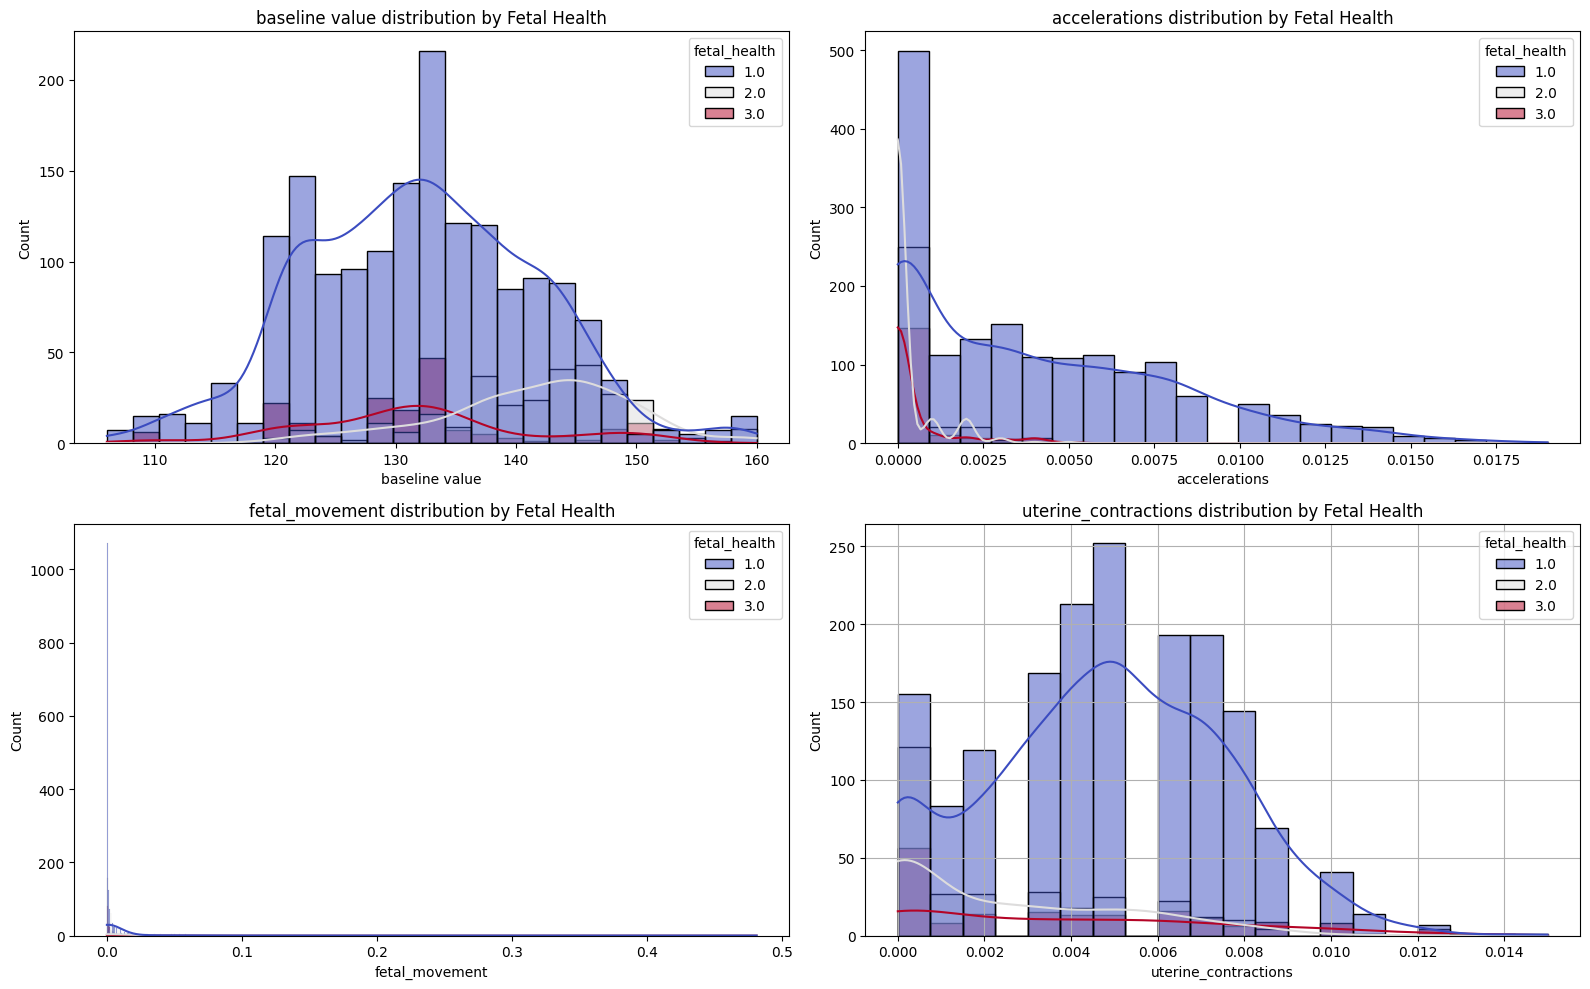

In [67]:
# Explore the distribution for each feature by fetal health status
features = df1.drop(columns='fetal_health').columns

plt.figure(figsize=(16, 10))

for i, name in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df1, x=name, hue='fetal_health', kde=True, palette='coolwarm')
    plt.title(f'{name} distribution by Fetal Health')
plt.tight_layout()
plt.grid(True)
plt.show()





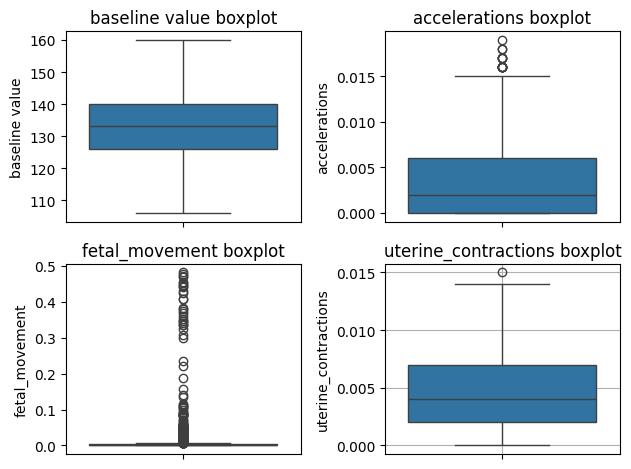

In [68]:


# Boxplot 

for i, name in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df1, y=name)
    plt.title(f'{name} boxplot')

plt.tight_layout()
plt.grid(True)
plt.show()

In [69]:


#split features and target variables 
X = df1.drop(columns='fetal_health')
y = df1.fetal_health

#split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#lets normalize the features 
scaler = StandardScaler()
XT_train = scaler.fit_transform(X_train)
XT_test = scaler.transform(X_test)

print(f'X_train shape: {XT_train.shape}')
print(f'Y train shape: {y_train.shape}')



X_train shape: (1700, 4)
Y train shape: (1700,)


In [70]:
# instantiate multiple models


models = {
    'Logistic regression': LogisticRegression(multi_class='multinomial'),
    'random forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    print(f'Model Training : {name}.......... ')
    start_time = time.time()
    model.fit(XT_train, y_train)
    y_pred_train = model.predict(XT_train)
    y_pred_test = model.predict(XT_test)
    duration = time.time() - start_time

    print(f'\ntraining complete for {name} duration : {duration}')

    #evaluating the model 
    print(f'class report on training set : {name}')

    class_report_train = classification_report(y_train, y_pred_train)
    print(f'\n{class_report_train}')

    print(f'class report on testing set : {name}')
    class_report_test = classification_report(y_test, y_pred_test)

    print(f'\n{class_report_test}')
    


Model Training : Logistic regression.......... 

training complete for Logistic regression duration : 0.016913414001464844
class report on training set : Logistic regression

              precision    recall  f1-score   support

         1.0       0.85      0.96      0.91      1322
         2.0       0.61      0.52      0.56       231
         3.0       0.79      0.07      0.14       147

    accuracy                           0.83      1700
   macro avg       0.75      0.52      0.53      1700
weighted avg       0.82      0.83      0.79      1700

class report on testing set : Logistic regression

              precision    recall  f1-score   support

         1.0       0.85      0.96      0.90       333
         2.0       0.65      0.48      0.55        64
         3.0       1.00      0.03      0.07        29

    accuracy                           0.83       426
   macro avg       0.83      0.49      0.51       426
weighted avg       0.83      0.83      0.79       426

Model Traini

In [85]:
#from the assessment you could see Random forest does perform better 

#we are going to use a grid search cv to check the best parameters that will improve our model better 

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10],
    'min_samples_split': [1,2,5],
    'min_samples_leaf': [1,2,5],
    'bootstrap':[True, False],
    'class_weight': [None, 'balanced']
}

#instantiate the grid search 
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)


#fit to the training data 
grid_search.fit(XT_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [86]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8585544967634989


In [84]:
#lets see the performance 

train_predictions = grid_search.predict(XT_train)
test_predictions = grid_search.predict(XT_test)

# print a classification report 

train_report = classification_report(y_train, train_predictions)
test_report = classification_report(y_test, test_predictions)

#print the train classification report 
print(f'Train classification report :\n{train_report}')

#print the test classification report:
print(f'test classification report:\n{test_report}')


Train classification report :
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96      1322
         2.0       0.83      0.74      0.78       231
         3.0       0.94      0.67      0.78       147

    accuracy                           0.92      1700
   macro avg       0.90      0.80      0.84      1700
weighted avg       0.92      0.92      0.92      1700

test classification report:
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.91       333
         2.0       0.68      0.56      0.62        64
         3.0       0.62      0.55      0.58        29

    accuracy                           0.85       426
   macro avg       0.73      0.68      0.70       426
weighted avg       0.84      0.85      0.85       426

